In [1]:
import numpy as np
from bs4 import BeautifulSoup as bs
import pandas as pd

import pandas_datareader as pdr
from pandas_datareader import data as wb
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams.update({'font.family' : 'sans'})
sm, med, lg = 10, 15, 20
plt.rc('font', size = sm)         # controls default text sizes
plt.rc('axes', titlesize = med)   # fontsize of the axes title
plt.rc('axes', labelsize = med)   # fontsize of the x & y labels
plt.rc('xtick', labelsize = sm)   # fontsize of the tick labels
plt.rc('ytick', labelsize = sm)   # fontsize of the tick labels
plt.rc('legend', fontsize = sm)   # legend fontsize
plt.rc('figure', titlesize = lg)  # fontsize of the figure title
plt.rc('axes', linewidth=2)       # linewidth of plot lines


import seaborn as sns
sns.set()

from scipy.optimize import minimize

import itertools
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from mpl_finance import candlestick_ohlc


import yfinance as yf
from yahoofinancials import YahooFinancials
from urllib.request import urlopen
import requests


import locale, sys 
from datetime import date, datetime, timedelta
import time, csv, json, os

from IPython.display import IFrame
# ![img](images/paintcarelogo.png)

import warnings
warnings.filterwarnings('ignore')


print('\n          * * * NO ISSUES - ALL IMPORTS LOADED * * * \n')


          * * * NO ISSUES - ALL IMPORTS LOADED * * * 



In [2]:
start = datetime(2018, 1, 2)
end = datetime.now()

# ticker = input('Ticker: ')
ticker = 'TSLA'

# Candle_Stick

,high,low,open,close,volume,adj close,date
Date,,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002,737426.0
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997,737427.0
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999,737430.0
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996,737431.0
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001,737432.0


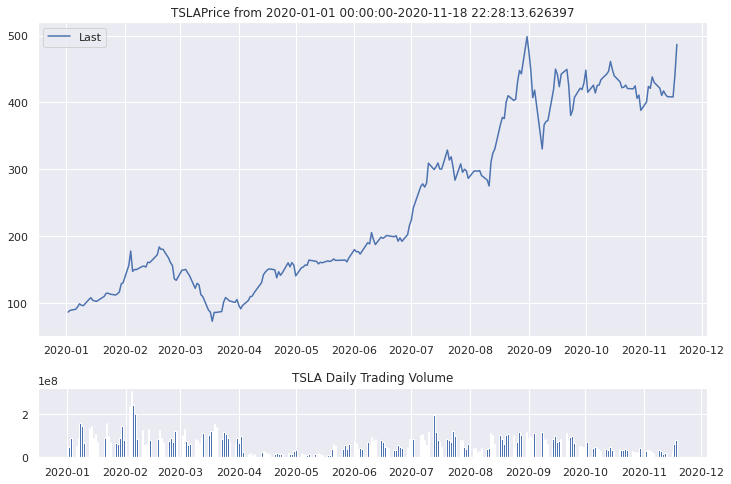

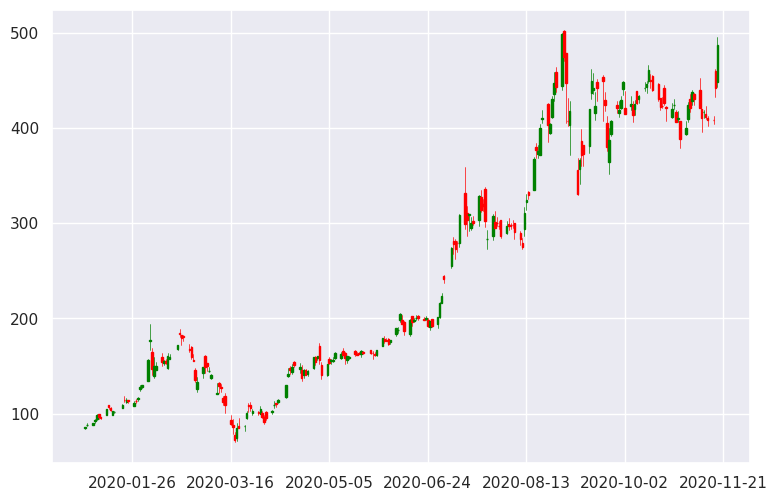

In [3]:
start = datetime(2020, 1, 1)
end = datetime.now()
#ticker = input('Ticker: ')
#ticker = 'AMZN'

df_00 = wb.get_data_yahoo(ticker, start = start)
# df_00.to_csv('data/candleStick.csv')
# df = pd.read_csv('data/candleStick.csv')

columns = df_00.columns
cols = [column.lower() for column in columns]
df_00.columns = cols
prices = df_00['adj close']
volumes = df_00['volume']

# The top plot consisting of daily closing prices
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(prices.index, prices, label='Last')
plt.title(str(ticker) + 'Price from ' + str(start) + '-' + str(end))
plt.legend(loc=2)

# The bottom plot consisting of daily trading volume
bottom = plt.subplot2grid((4, 4), (3,0), rowspan=1, colspan=4)
bottom.bar(volumes.index, volumes)
plt.title(str(ticker)+' Daily Trading Volume')
plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75)

# create candle stick df & plot
df_00['date'] = df_00.index.map(mdates.date2num)
df_ohlc = df_00[['date','open', 'high', 'low', 'adj close']]

figure, ax = plt.subplots(figsize = (9,6), dpi = 100)

formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(
    ax, df_ohlc.values, width=0.8, colorup='green', colordown='red')

df_00.head()

# Compare Returns


 . . . . . Here Are The Results (2020-01-01 00:00:00 - 2020-11-18 23:03:04.694436): . . . . .

   (a) Average Price: 

       TSLA = $247.87
       ^GSPC = $3,158.83
       ^IXIC = $9,907.08
       ^DJI = $26,483.33

   (b) Average Daily Return: 

       TSLA = 0.7769 %
       ^GSPC = 0.0408 %
       ^IXIC = 0.1170 %
       ^DJI = 0.0088 %

   (c) Variance To Return: 

       TSLA = 0.3431 %
       ^GSPC = 0.0537 %
       ^IXIC = 0.0571 %
       ^DJI = 0.0613 %

   (d) Standard Deviation To Return: 

       TSLA = 5.8573 %
       ^GSPC = 2.3177 %
       ^IXIC = 2.3894 %
       ^DJI = 2.4751 %




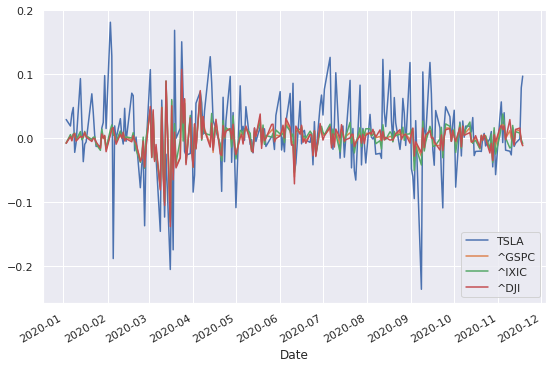

In [87]:
# Importing Commodity Prices

tickers = [ticker, '^GSPC', '^IXIC', '^DJI']
df = pd.DataFrame()
for t in tickers:
    df[t] = wb.DataReader(t, data_source='yahoo',start=start, end=end)['Close']
# df.to_csv('data/compareReturns.csv')


# Functions:
def log_return(prices):
    return np.log(prices/prices.shift(1))

def display_as_percentage(val):
    return ('{:.4f} %'.format(val * 100))

def daily_return(dataset):
    DR = []
    for i in range(len(tickers)):
        DR.append(np.sum(dataset[tickers[i]]) / len(dataset[tickers[i]]))
    return DR

def avg_price(dataset):
    ap = []
    for i in range(len(tickers)):
        aa = (np.sum(df[tickers[i]]) / len(df[tickers[i]]))
        ap.append(round(aa,2))
    return ap

def display_as_dollar(val):
    return ('$'+f'{val:,}')

    
# Calculatings (log_return, avg_price, variance)
avgPrice = avg_price(df)
returns = log_return(df)
returns = returns.iloc[1:]
dailyReturn = daily_return(returns)
var = returns.var()
std = returns.std()


print(f'\n . . . . . Here Are The Results ({start} - {end}): . . . . .\n\n   (a) Average Price: \n')
for r in range(len(tickers)):
    print(f'       {tickers[r]} = {display_as_dollar(avgPrice[r])}')

print(f'\n   (b) Average Daily Return: \n')
for r in range(len(tickers)):
    print(f'       {tickers[r]} = {display_as_percentage(dailyReturn[r])}')

print(f'\n   (c) Variance To Return: \n')
for r in range(len(tickers)):
    print(f'       {tickers[r]} = {display_as_percentage(var[r])}')

print(f'\n   (d) Standard Deviation To Return: \n')
for r in range(len(tickers)):
    print(f'       {tickers[r]} = {display_as_percentage(std[r])}')
print('\n')

returns.plot(figsize = (9,6));

# Risk_Return_Plots:

Standard Deviation Of: TSLA = 5.844%


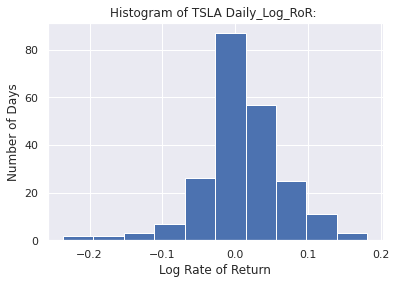

In [92]:
# ticker = 'AAPL'
# ticker = input('Ticker: ')

df3 = wb.get_data_yahoo(ticker, start = start)
# df3.to_csv('data/_104.csv')
# df = pd.read_csv('data/_104.csv')

df3['Daily_Log_RoR'] = np.log(df3['Adj Close'] / df3['Adj Close'].shift(1))
stdev = np.std(df3['Daily_Log_RoR'])


plt.hist(df3['Daily_Log_RoR'].dropna())
plt.title('Histogram of '+str(ticker)+' Daily_Log_RoR: ')
plt.xlabel('Log Rate of Return')
plt.ylabel('Number of Days')

def display_as_percentage(val):
    return '{:.3f}%'.format(val * 100)

print(f'Standard Deviation Of: {ticker} = {display_as_percentage(stdev)}')
# df3 = df3.drop(['High','Low','Open','Close'], axis=1)